In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import spacy
import textacy
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 8)
plt.style.use('ggplot')

In [2]:
nlp = spacy.load('en')

In [3]:
db = pd.read_hdf('james.hdf', 'james')

In [4]:
db['length'] = db.text_cleaned.apply(len)

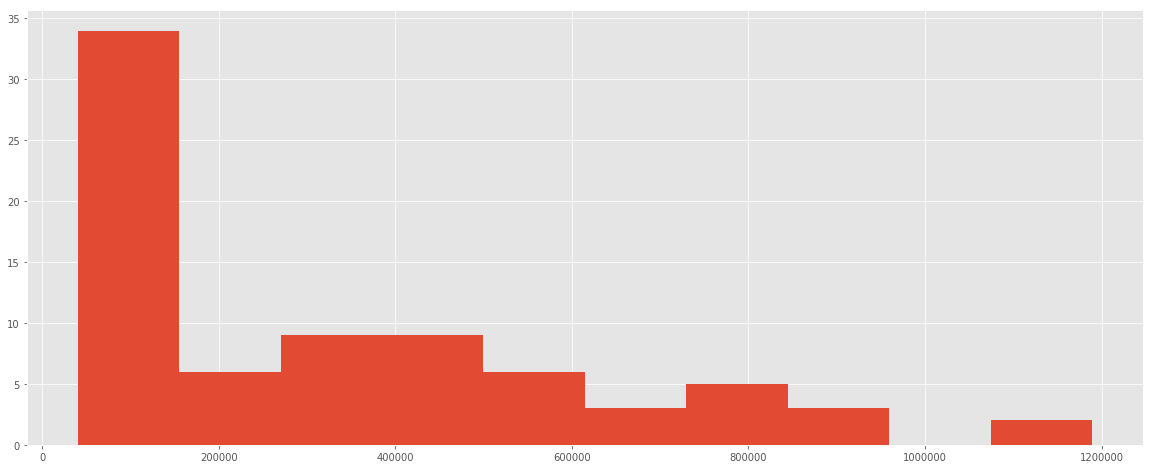

In [5]:
db['length'].hist()

In [6]:
longWorks = db.loc[db['length'] > 200000]

In [7]:
longTexts = longWorks.text_cleaned.tolist()

In [8]:
longMeta = longWorks[['id', 'subjects', 'title', 'local_url', 'pub_date']]

In [9]:
metaList = []
for i, row in longMeta.iterrows(): 
    metaList.append(row.to_dict())

In [10]:
len(metaList)

40

In [11]:
james = textacy.corpus.Corpus('en', longTexts, metadatas=metaList)

In [12]:
james

Corpus(40 docs; 5093464 tokens)

In [14]:
len(james.docs)

40

In [15]:
rh = james.docs[0]

In [16]:
rh.metadata['title']

'Roderick Hudson'

In [45]:
def sentHist(doc): 
    s = pd.Series([len(sent) for sent in doc.sents])
    return s.hist()

def sentStats(doc): 
    s = pd.Series([len(sent) for sent in doc.sents])
    return s.describe()

In [46]:
# Make histogram bins for all sentences, first. 
allLengths = []
for doc in james.docs: 
    for length in [len(sent) for sent in doc.sents]: 
        allLengths.append(length)
hist = np.histogram(allLengths)
bins = hist[1]

In [49]:
# Now do histograms for individual novels using these bins.  
hists = {doc.metadata['title']: np.histogram([len(sent) for sent in doc.sents], bins=bins)[0]
         for doc in james.docs}

In [50]:
df = pd.DataFrame(hists)

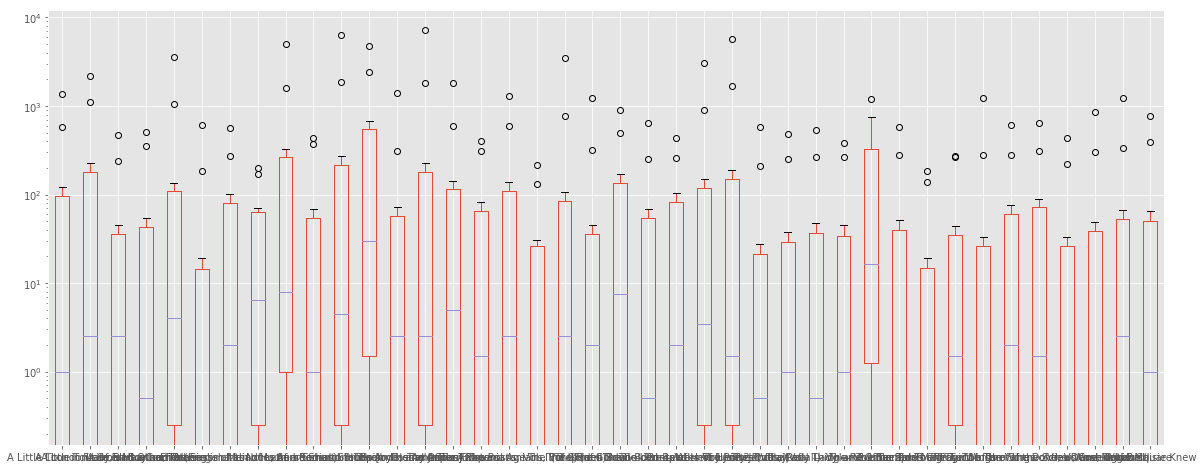

In [52]:
df.plot(kind='box', logy=True)

In [50]:
# Find longest sentence
allSents = []
for doc in james:
    for sent in doc.sents:
        allSents.append((len(sent), sent, doc.metadata['title']))

In [51]:
allSents = sorted(allSents, key=lambda x: x[0])

In [52]:
len(allSents)

191536

In [68]:
allSents[-12]

(245, None the less do I
 regain it as a part of my current vision that Frau Stromberg, who was
 young and fair, wrote tragedies as well as made pancakes--which were
 served to each consumer double, a thick confiture within being the
 reason of this luxuriance, and being also a note beyond our experience
 in the Bonn-Gasse; and that with the printed five acts of a certain
 "Cleopatra" before me, read aloud in the first instance to her young
 inmates and by my brother passed on to me, I lost myself in the view of
 I scarce knew what old-world Germanic grace, positively, or little
 court-city practice of the theatre: these things so lived in the small
 thick pamphlet, "grey paper with blunt type" and bristling, to my
 discomfiture, with descriptive stage directions, vast dense bracketed
 tracts, gothic enough in all conscience, as to which I could already
 begin to wonder whether such reinforcements of presentation proved more
 for or against the true expressional essence of the matter; 

In [189]:
import pandas as pd
from matplotlib import pyplot as plt
import spacy
import textacy
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = (24, 12)
plt.style.use('ggplot')
from glob import glob

In [86]:
rawDocs = sorted(glob('text/*'))
metadata = [{'filename': fn} for fn in rawDocs]

In [87]:
texts = [open(f).read() for f in rawDocs]

In [88]:
docs = textacy.corpus.Corpus('en', texts, metadatas=metadata) 

In [163]:
numSents = [doc.n_sents for doc in docs]

In [89]:
allSents = []
for doc in docs:
    for sent in doc.sents:
        allSents.append((sent, len(sent), doc.metadata['filename']))

In [90]:
len(allSents) 

139481

In [91]:
sortedSents = sorted(allSents, key=lambda x: x[1])

In [104]:
sortedSents[-13]

(To the casual eye a mere smart and shining youth of
 less than thirty summers, faultlessly appointed in every particular, he
 yet stood among his progeny--eleven in all, as he confessed without a
 sigh, eleven little brown clear faces, yet with such impersonal old eyes
 astride of such impersonal old noses--while he entertained the great
 American collector whom he had so long hoped he might meet, and whose
 charming companion, the handsome, frank, familiar young lady, presumably
 Mrs. Verver, noticed the graduated offspring, noticed the fat,
 ear-ringed aunts and the glossy, cockneyfied, familiar uncles,
 inimitable of accent and assumption, and of an attitude of cruder
 intention than that of the head of the firm; noticed the place in short,
 noticed the treasure produced, noticed everything, as from the habit
 of a person finding her account at any time, according to a wisdom well
 learned of life, in almost any “funny” impression.,
 196,
 'text/1904-golden-bowl.txt')

In [105]:
# Do histograms of sentence lengths per text.
sentenceLengths = {}
for doc in docs:
    sentenceLengths[doc.metadata['filename']] = [len(sent) for sent in doc.sents]

In [110]:
allLengths = []
for text in sentenceLengths:
    for length in sentenceLengths[text]:
        allLengths.append(length)

In [117]:
bins = np.histogram(allLengths)[1]

In [118]:
hists = {filename: np.histogram(lengths, bins=bins)[0]
         for filename, lengths in sentenceLengths.items()}

In [147]:
df = pd.DataFrame(hists).T

In [167]:
# Divide by total number of sentences in each novel. 
normalized = df.divide(numSents, axis=0).multiply(100)

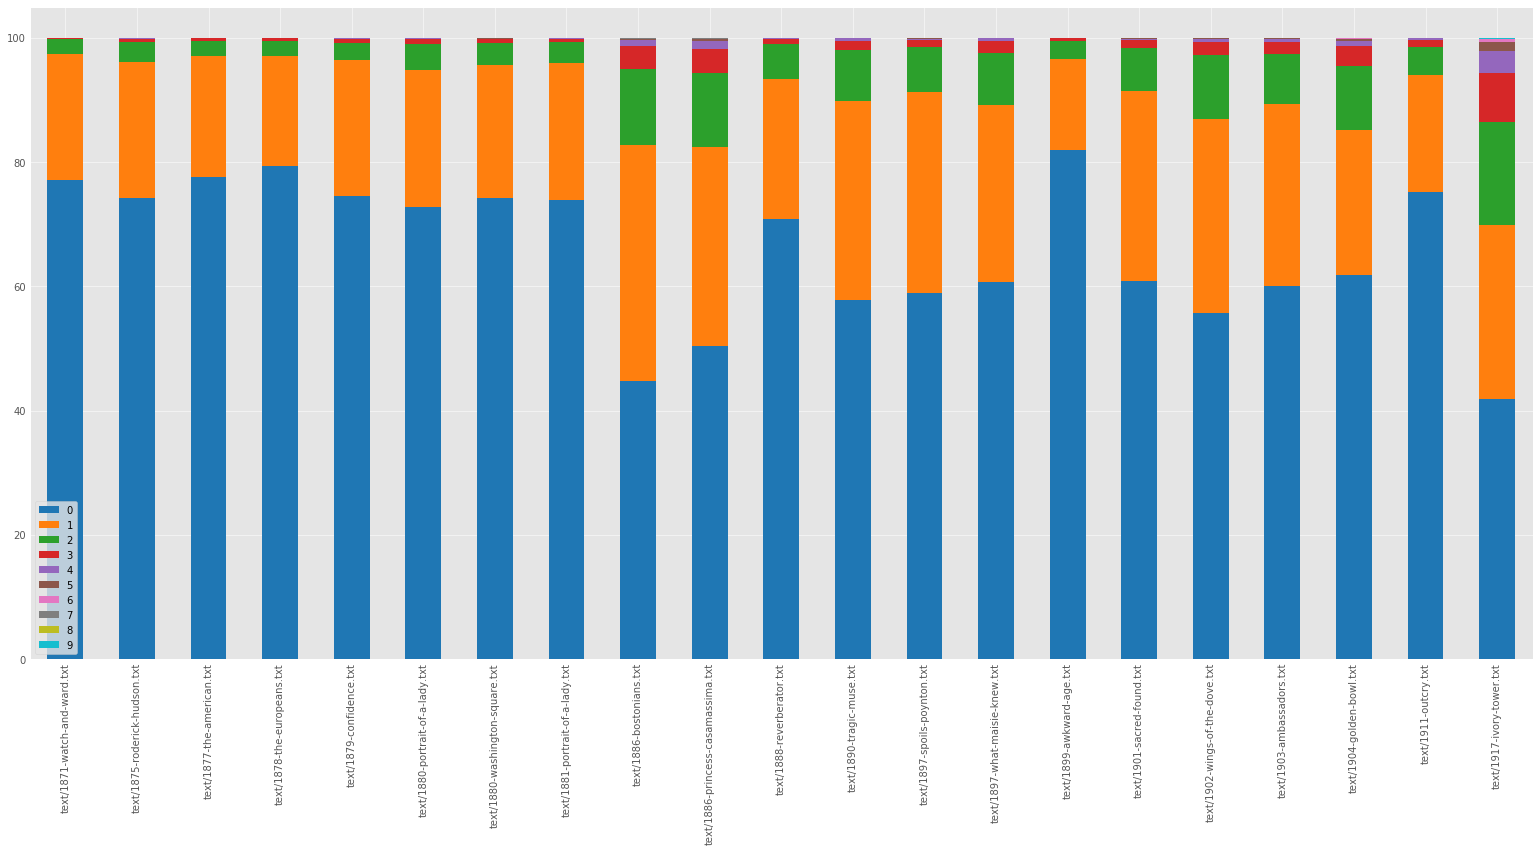

In [202]:
normalized.plot(kind='bar', stacked=True, cmap='Vega10')

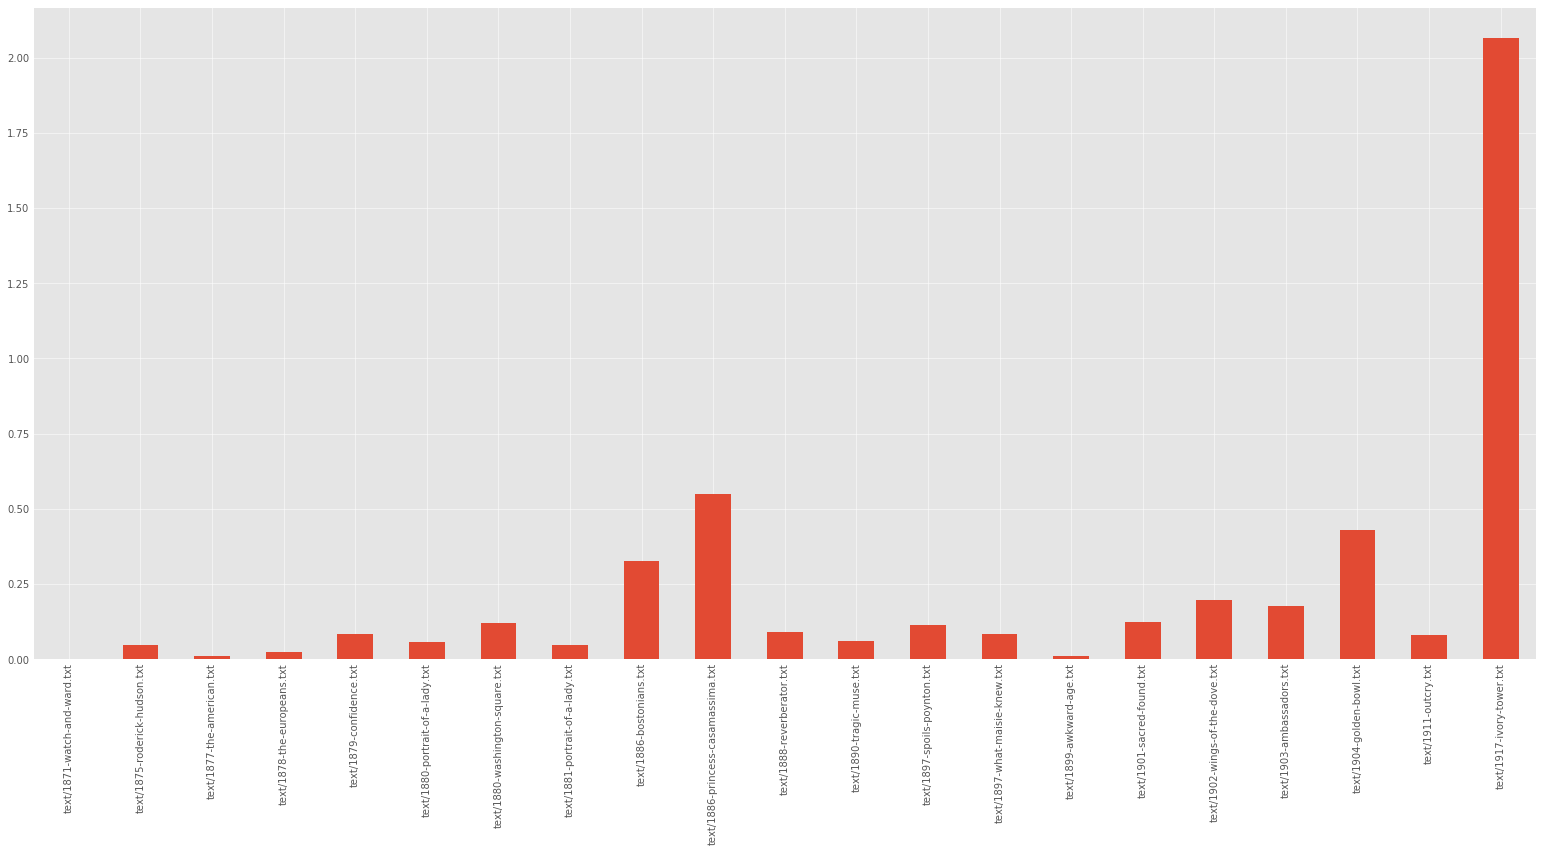

In [222]:
normalized[[5, 6, 7, 8, 9]].sum(axis=1).plot(kind='bar')

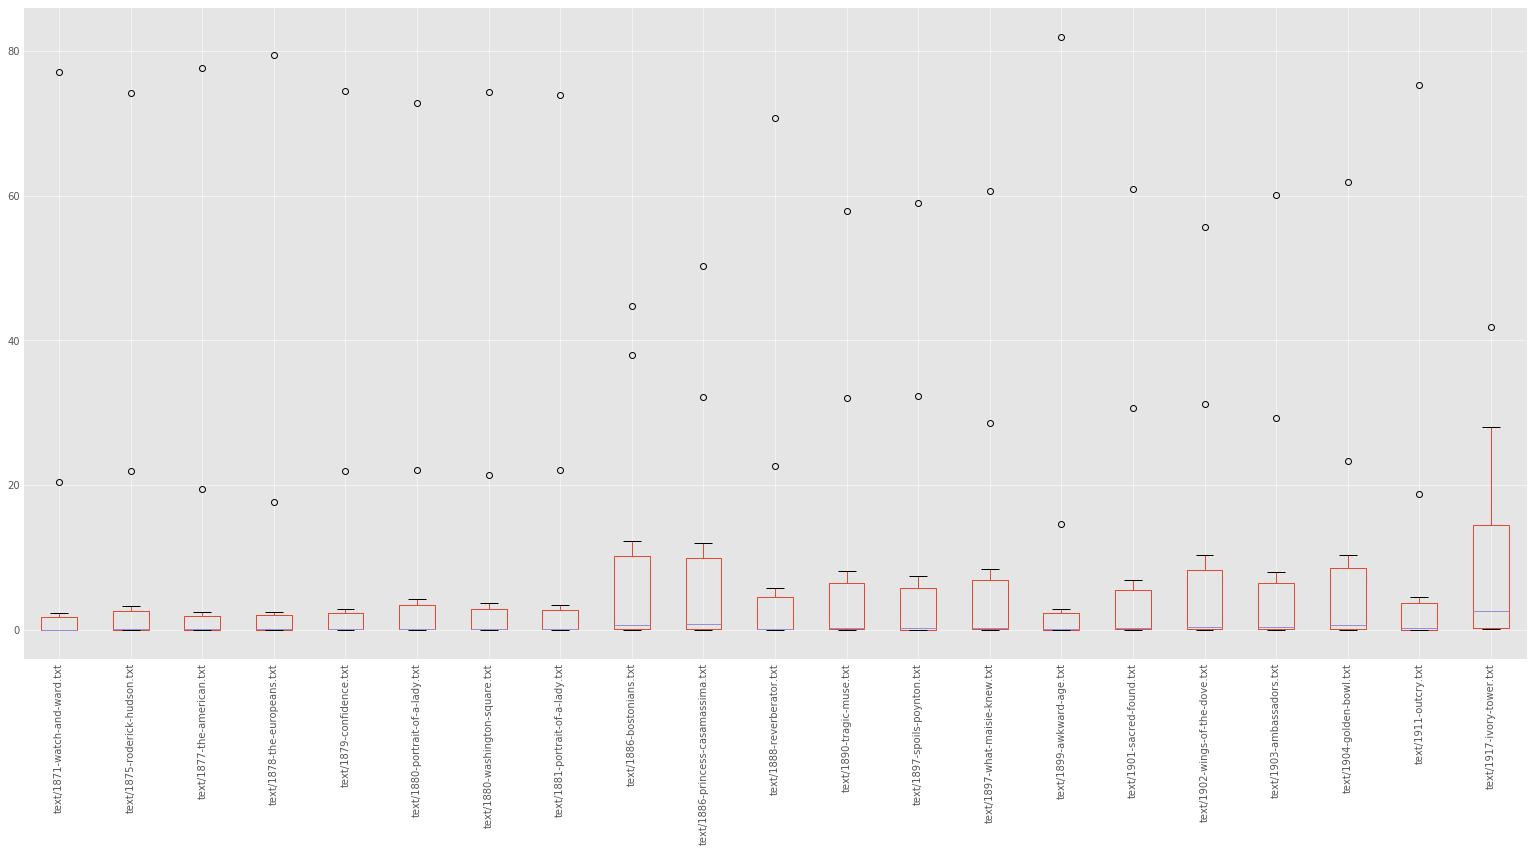

In [200]:
normalized.T.plot(kind='box', rot=90)